In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.formula.api as smf
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.holtwinters import SimpleExpSmoothing
from statsmodels.tsa.holtwinters import Holt
from statsmodels.tsa.holtwinters import ExponentialSmoothing
import statsmodels.graphics.tsaplots as tsa_plots

In [ ]:
Question 1) 
Forecast the cococola prices.

In [2]:
import warnings
warnings.filterwarnings("ignore")

In [3]:
#Read the data set
coco=pd.read_excel("CocaCola_Sales_Rawdata.xlsx")
coco.head()

,Quarter,Sales
0,Q1_86,1734.827000
1,Q2_86,2244.960999
2,Q3_86,2533.804993
3,Q4_86,2154.962997
4,Q1_87,1547.818996


# EDA

In [4]:
coco.columns

Index(['Quarter', 'Sales'], dtype='object')

In [5]:
coco.shape

(42, 2)

In [6]:
coco.describe()

,Sales
count,42.000000
mean,2994.353308
std,977.930896
min,1547.818996
25%,2159.714247
50%,2782.376999
75%,3609.250000
max,5253.000000


In [7]:
coco.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42 entries, 0 to 41
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Quarter  42 non-null     object 
 1   Sales    42 non-null     float64
dtypes: float64(1), object(1)
memory usage: 800.0+ bytes


In [8]:
coco.tail(3)

,Quarter,Sales
39,Q4_95,4333.0
40,Q1_96,4194.0
41,Q2_96,5253.0


In [9]:
coco.sample()

,Quarter,Sales
22,Q3_91,3172.115997


In [10]:
coco.dtypes

Quarter     object
Sales      float64
dtype: object

In [11]:
coco.isna().sum()

Quarter    0
Sales      0
dtype: int64

# Data Visualization

Text(-2.1805555555555625, 0.5, 'Sales')

<Figure size 1400x600 with 0 Axes>

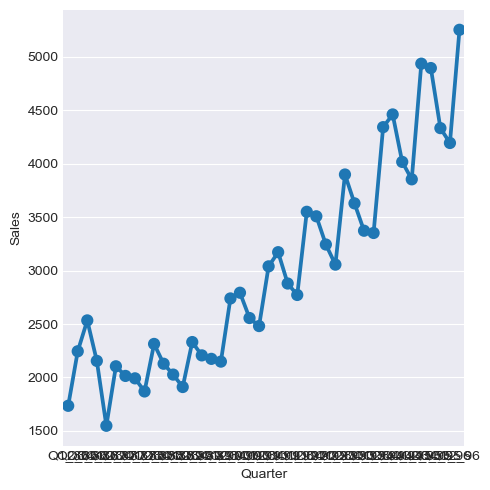

In [12]:
plt.figure(figsize=(14,6))
plt.style.use('seaborn-darkgrid')
sns.factorplot("Quarter","Sales",data=coco,s=20)
plt.xlabel("Quarter",size=10)
plt.ylabel("Sales",size=10)

<AxesSubplot:xlabel='Sales'>

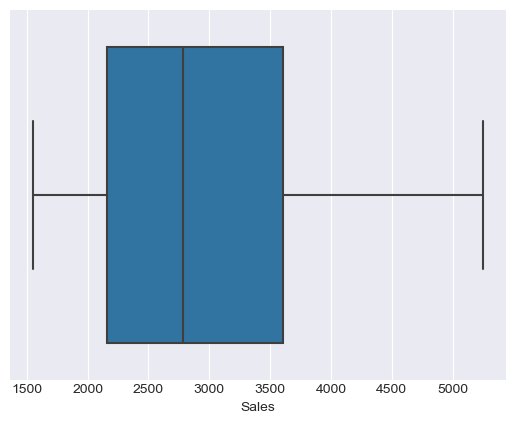

In [13]:
sns.boxplot(coco.Sales)

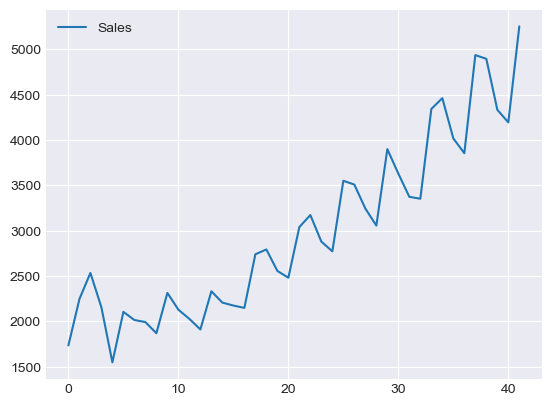

In [14]:
from matplotlib import pyplot
coco.plot()
pyplot.show()

# Moving Average Method

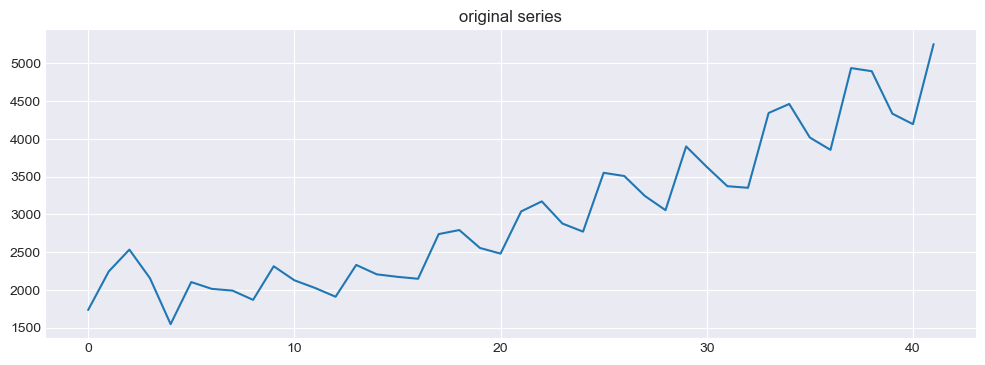

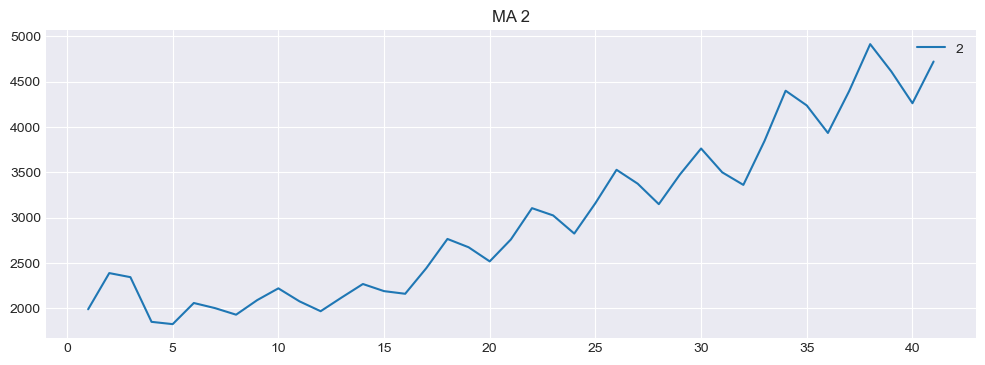

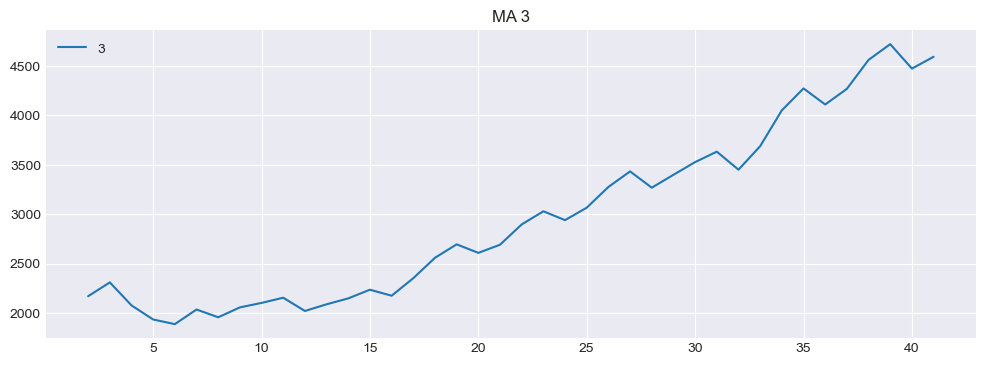

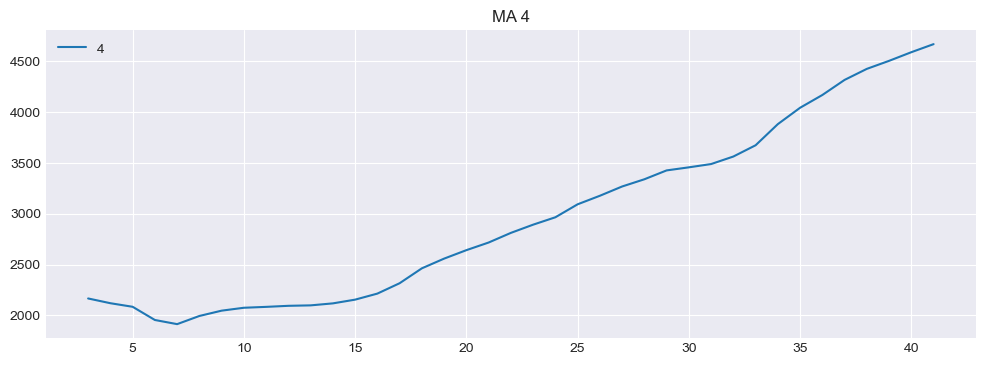

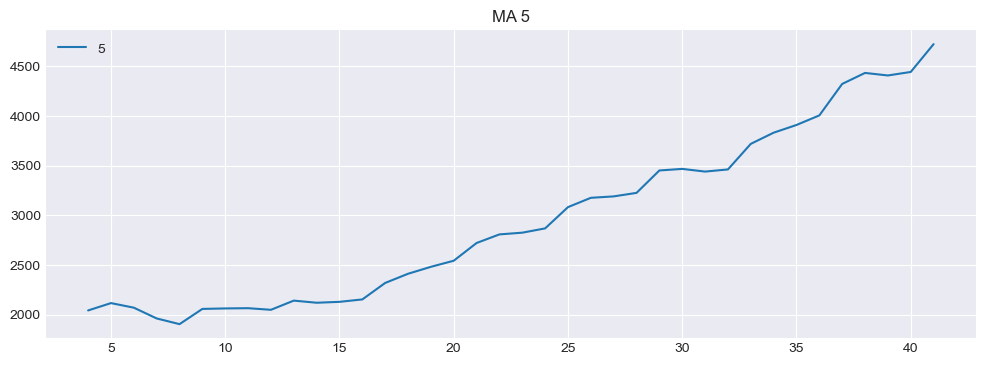

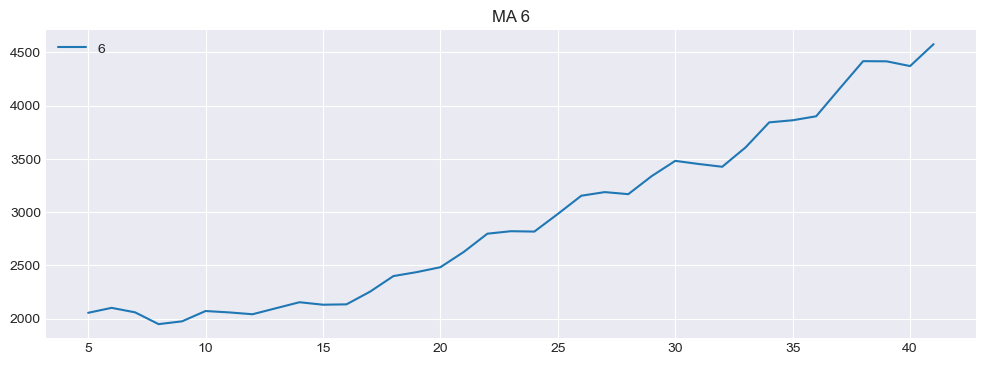

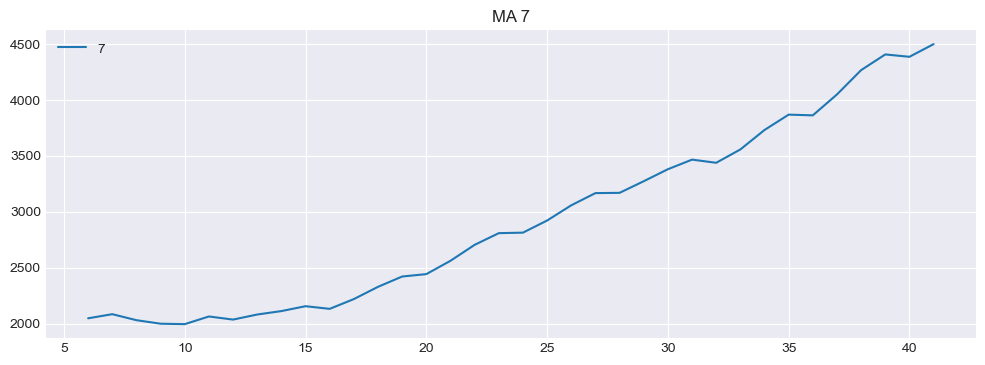

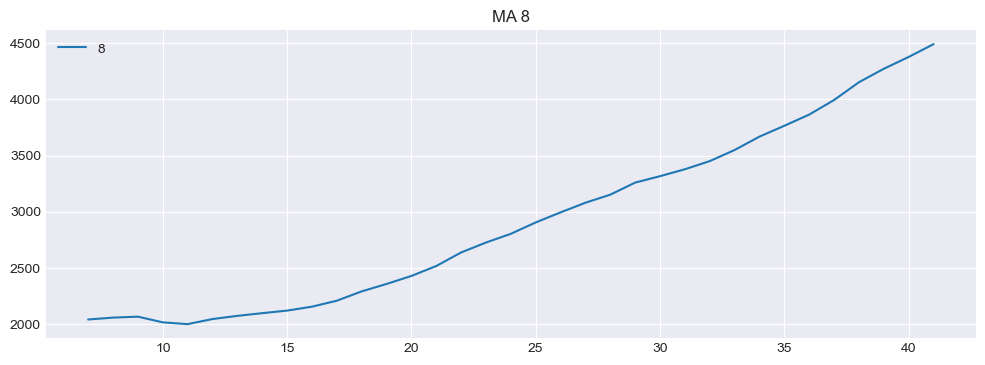

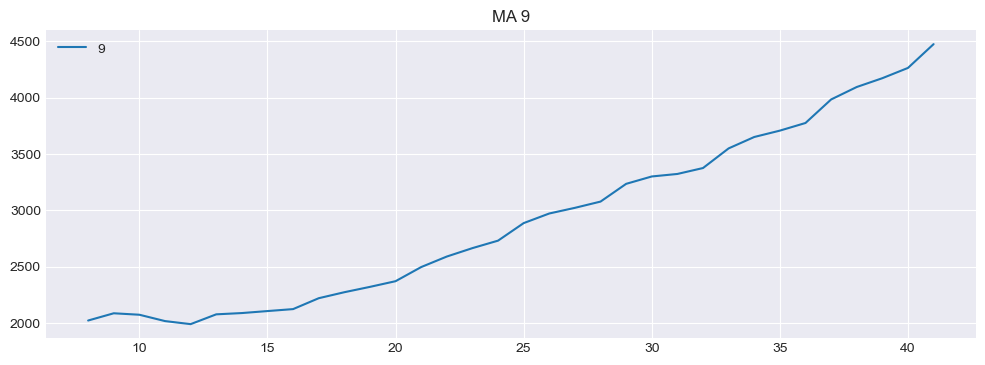

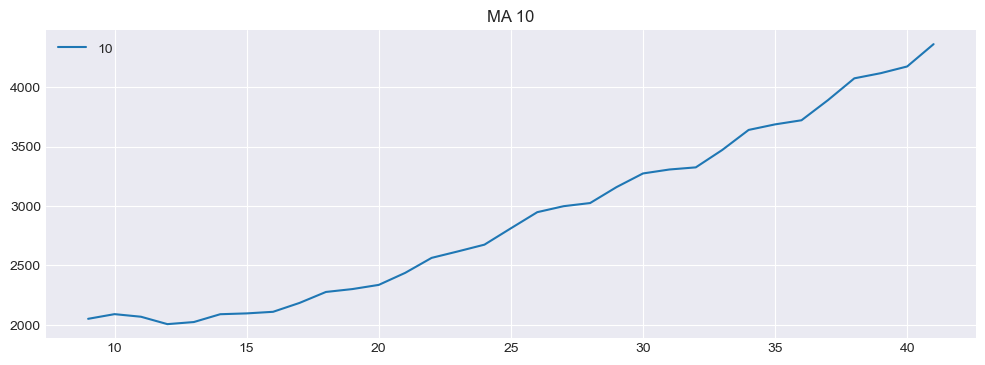

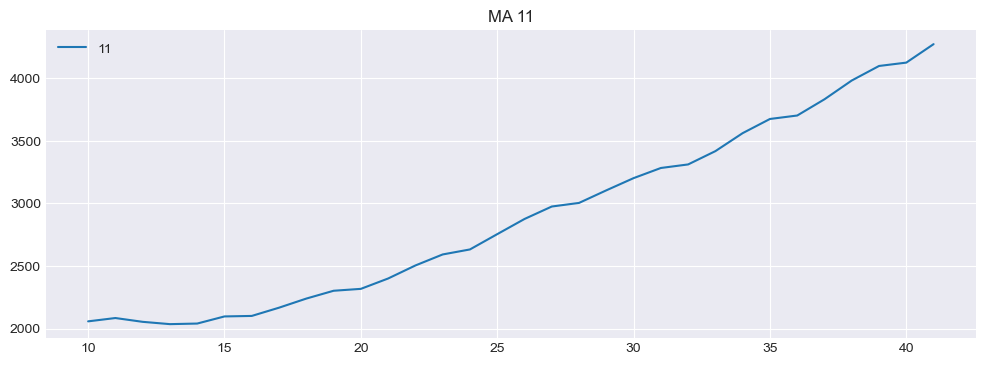

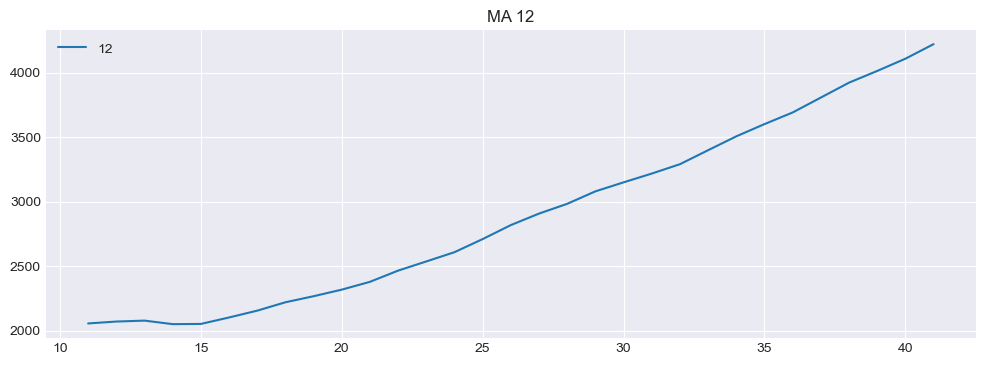

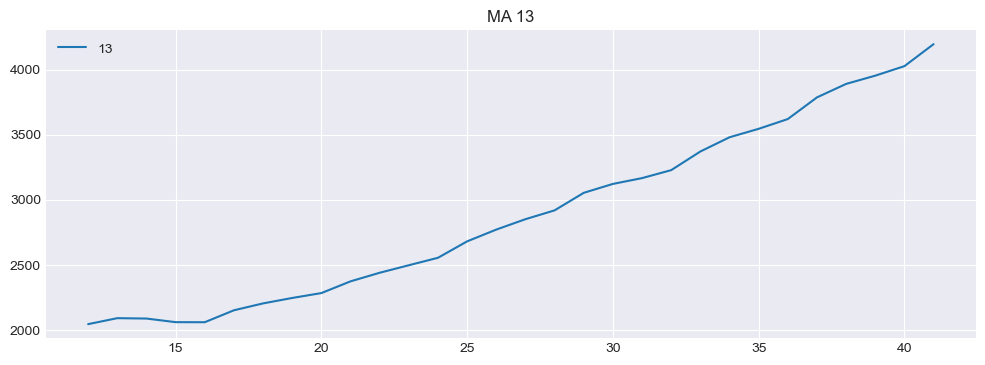

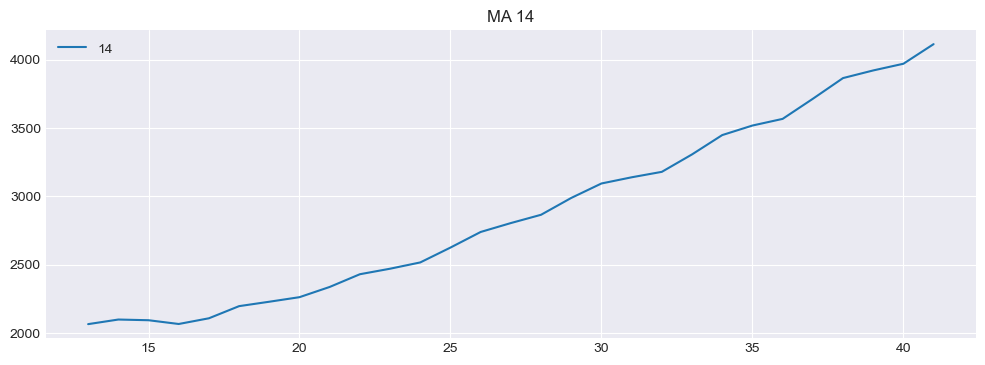

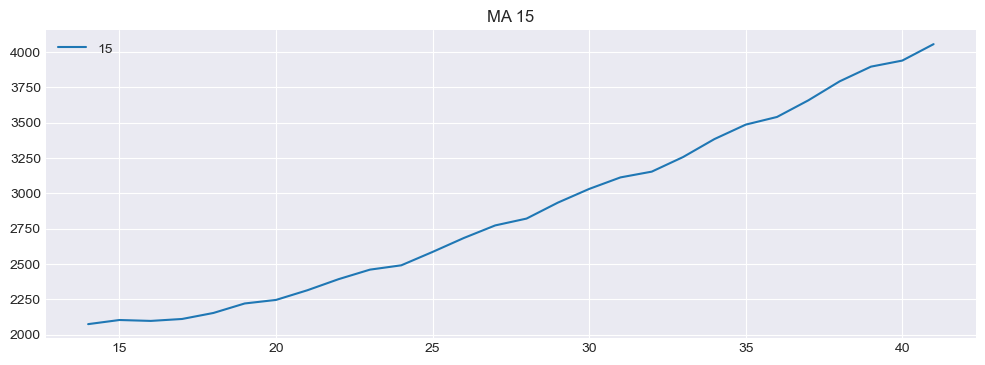

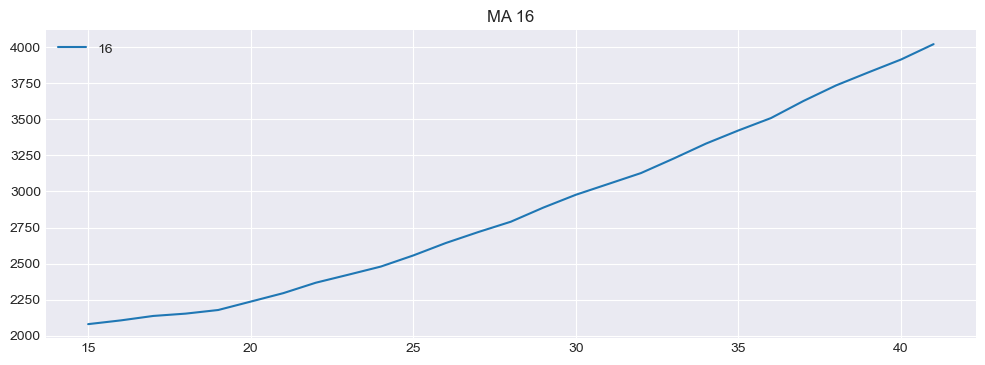

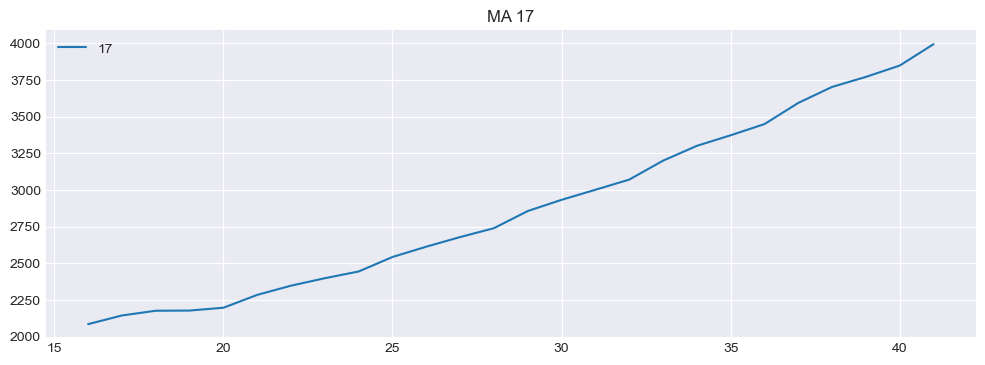

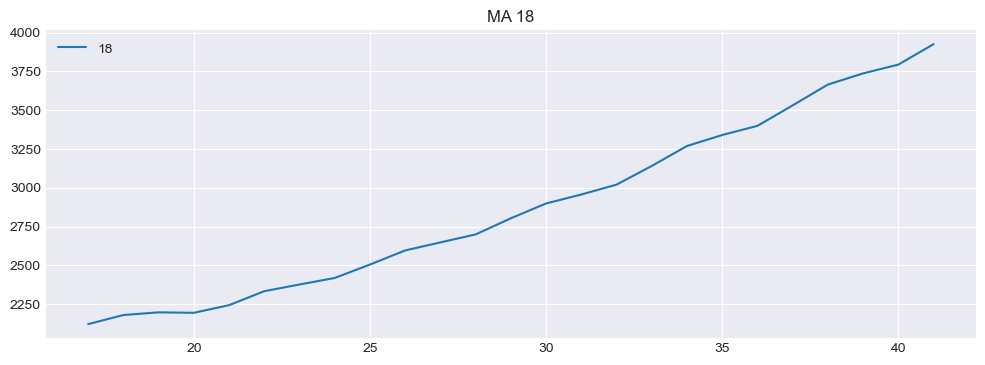

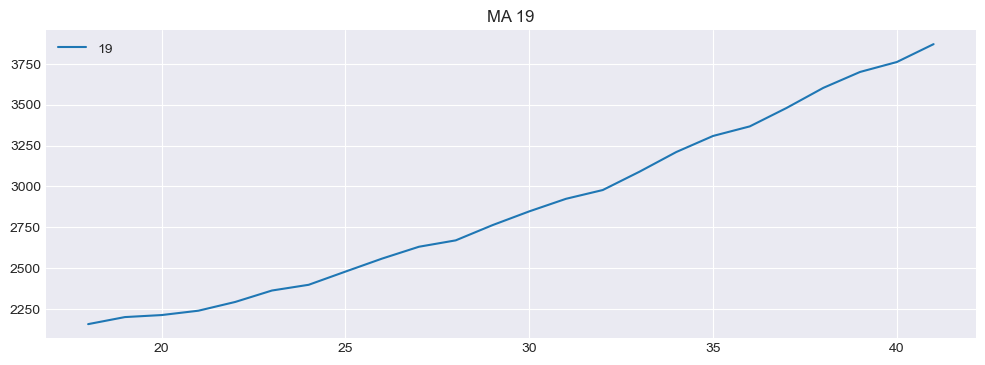

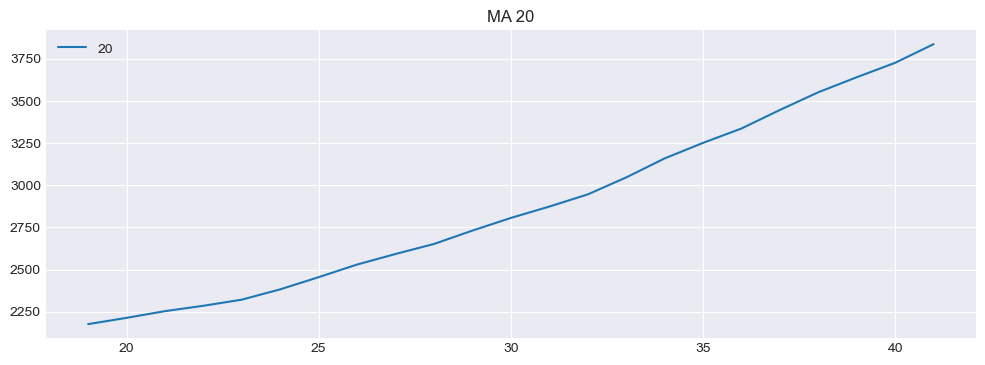

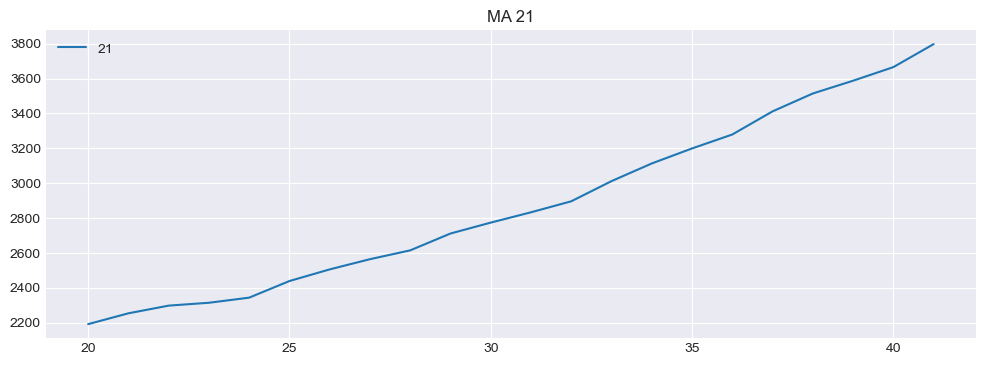

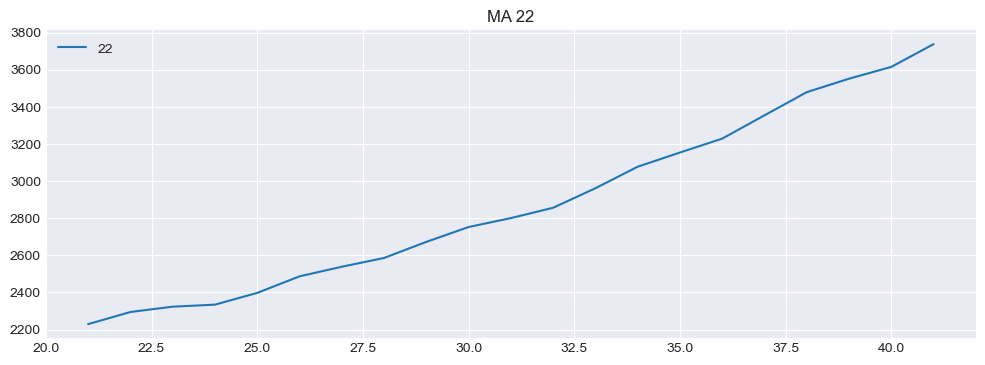

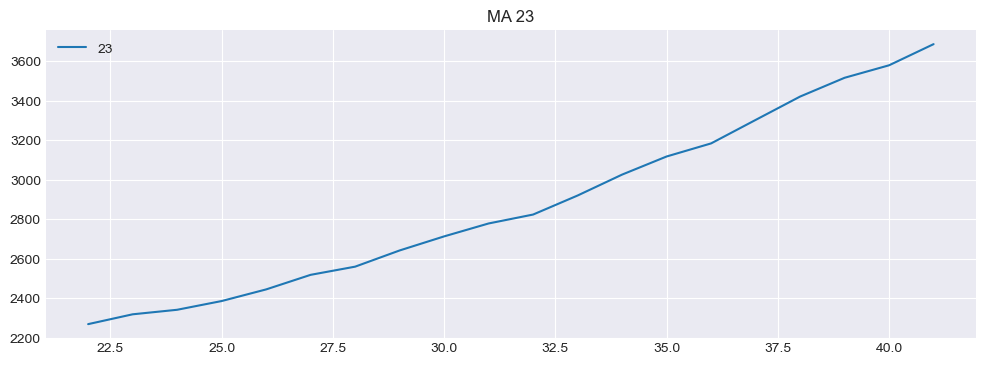

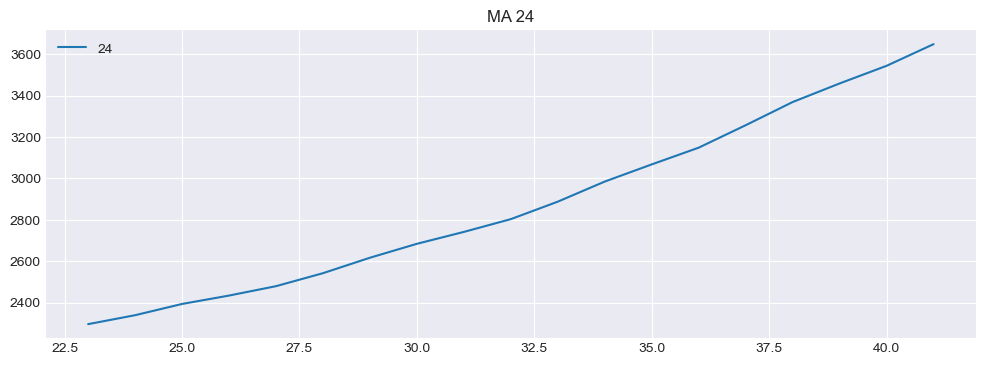

In [15]:
plt.figure(figsize=(12,4))
coco.Sales.plot(label="org")
plt.title("original series")

for i in range(2,25):
    plt.figure(figsize=(12,4))


    coco["Sales"].rolling(i).mean().plot(label=str(i))
    plt.title("MA "+str(i))
    plt.legend(loc='best')
    plt.show()

# Time series decomposition plot

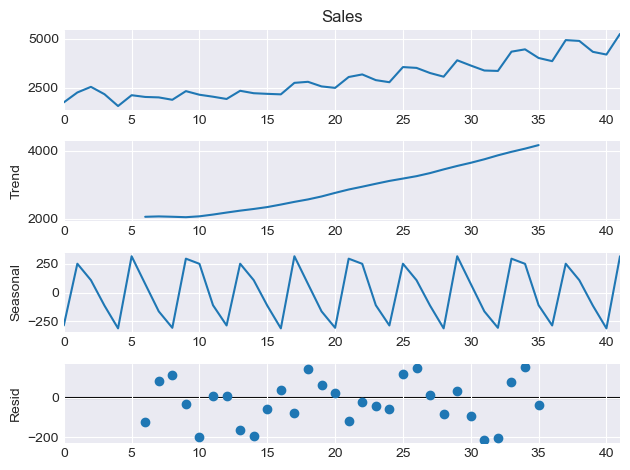

In [16]:
#from statsmodels.tsa.seasonal import seasonal_decompose
decompose_ts_add = seasonal_decompose(coco.Sales,period=12)
decompose_ts_add.plot()
plt.show()

# ACF and PACF plots

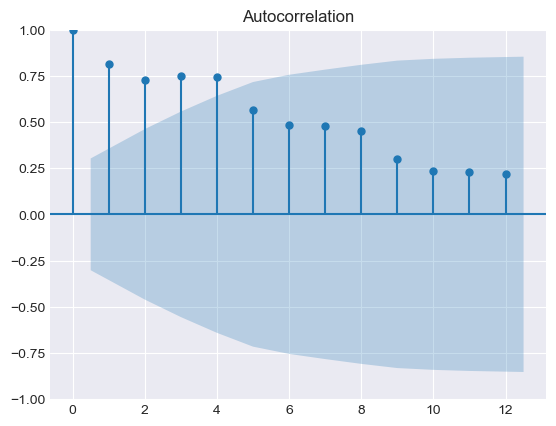

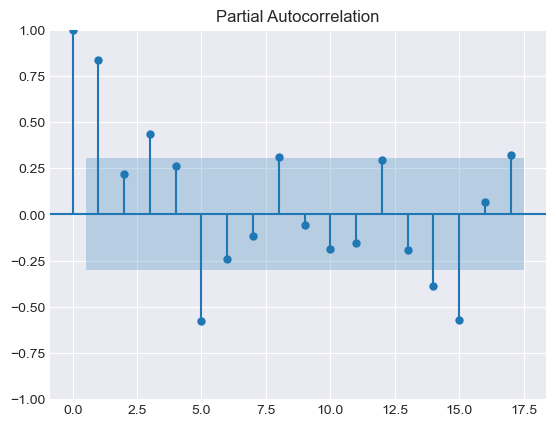

In [17]:
tsa_plots.plot_acf(coco.Sales,lags=12)
tsa_plots.plot_pacf(coco.Sales)
plt.show()

# Model building

In [18]:
Train=coco.head(32)
Test=coco.tail(10)

# Evaluation matrix MAPE

In [19]:
def MAPE(org,pred):
    temp = np.abs((pred-org)/org)*100
    return np.mean(temp)

# Simple exponential method

In [20]:
ses_model = SimpleExpSmoothing(Train["Sales"]).fit(smoothing_level=0.2)
pred_ses = ses_model.predict(start = Test.index[0],end = Test.index[-1])
MAPE(pred_ses,Test.Sales)

31.44241469355821

In [21]:
pred_ses

32    3319.856844
33    3319.856844
34    3319.856844
35    3319.856844
36    3319.856844
37    3319.856844
38    3319.856844
39    3319.856844
40    3319.856844
41    3319.856844
dtype: float64

In [22]:
import numpy as np
x=np.linspace(0.1,1,20)
for i in x :
    ses_model = SimpleExpSmoothing(Train["Sales"]).fit(smoothing_level=i)
    pred_ses = ses_model.predict(start = Test.index[0],end = Test.index[-1])
    score=MAPE(pred_ses,Test.Sales) 
    print("smoothing_level ",i,"-->","MAPE Error",score)

smoothing_level  0.1 --> MAPE Error 44.58223677567373
smoothing_level  0.1473684210526316 --> MAPE Error 36.4003351739034
smoothing_level  0.19473684210526315 --> MAPE Error 31.813126465157325
smoothing_level  0.24210526315789474 --> MAPE Error 29.297800053270993
smoothing_level  0.2894736842105263 --> MAPE Error 27.928232500690502
smoothing_level  0.33684210526315794 --> MAPE Error 27.08849238493112
smoothing_level  0.38421052631578945 --> MAPE Error 26.58410740663489
smoothing_level  0.43157894736842106 --> MAPE Error 26.306157965782894
smoothing_level  0.4789473684210527 --> MAPE Error 26.190742022677938
smoothing_level  0.5263157894736842 --> MAPE Error 26.19864816594353
smoothing_level  0.5736842105263158 --> MAPE Error 26.30460672197439
smoothing_level  0.6210526315789474 --> MAPE Error 26.491281927707018
smoothing_level  0.6684210526315789 --> MAPE Error 26.745709665333287
smoothing_level  0.7157894736842105 --> MAPE Error 27.057057997162595
smoothing_level  0.7631578947368421 -

# Holt Method

In [23]:
# Holt method 
hw_model = Holt(Train["Sales"]).fit(smoothing_level=0.8, smoothing_slope=0.2)
pred_hw = hw_model.predict(start = Test.index[0],end = Test.index[-1])
MAPE(pred_hw,Test.Sales) 


21.20166067603306

In [24]:
pred_hw

32    3483.120586
33    3513.160469
34    3543.200352
35    3573.240235
36    3603.280118
37    3633.320000
38    3663.359883
39    3693.399766
40    3723.439649
41    3753.479532
dtype: float64

In [25]:
import numpy as np
alphas=np.arange(0.1,1,0.1)
betas=np.arange(0.1,1,0.1)
l=[]
for i in alphas :
    for j in betas:
        hw_model = Holt(Train["Sales"]).fit(smoothing_level=i, smoothing_slope=j)
        print(hw_model)
        pred_hw = hw_model.predict(start = Test.index[0],end = Test.index[-1])
        
        score=MAPE(pred_hw,Test.Sales)
        print("smoothing_level ",i," smoothing_slope",j,"-->","MAPE Error",score)
        l.append((i,j,score))

smoothing_level  0.1  smoothing_slope 0.1 --> MAPE Error 14.516727732726295
smoothing_level  0.1  smoothing_slope 0.2 --> MAPE Error 10.364043863654322
smoothing_level  0.1  smoothing_slope 0.30000000000000004 --> MAPE Error 9.447168811056454
smoothing_level  0.1  smoothing_slope 0.4 --> MAPE Error 9.35474975770126
smoothing_level  0.1  smoothing_slope 0.5 --> MAPE Error 9.49620391069207
smoothing_level  0.1  smoothing_slope 0.6 --> MAPE Error 9.742558310255955
smoothing_level  0.1  smoothing_slope 0.7000000000000001 --> MAPE Error 10.638243749139798
smoothing_level  0.1  smoothing_slope 0.8 --> MAPE Error 11.958389313951443
smoothing_level  0.1  smoothing_slope 0.9 --> MAPE Error 13.364989641947929
smoothing_level  0.2  smoothing_slope 0.1 --> MAPE Error 11.607017463223002
smoothing_level  0.2  smoothing_slope 0.2 --> MAPE Error 9.75562623570094
smoothing_level  0.2  smoothing_slope 0.30000000000000004 --> MAPE Error 10.160291517126623
smoothing_level  0.2  smoothing_slope 0.4 --> MAP

smoothing_level  0.7000000000000001  smoothing_slope 0.9 --> MAPE Error 74.92158085044854
smoothing_level  0.8  smoothing_slope 0.1 --> MAPE Error 17.71041615680637
smoothing_level  0.8  smoothing_slope 0.2 --> MAPE Error 21.20166067603306
smoothing_level  0.8  smoothing_slope 0.30000000000000004 --> MAPE Error 26.6031588677117
smoothing_level  0.8  smoothing_slope 0.4 --> MAPE Error 33.16392853142597
smoothing_level  0.8  smoothing_slope 0.5 --> MAPE Error 41.319960052502104
smoothing_level  0.8  smoothing_slope 0.6 --> MAPE Error 52.05502099046207
smoothing_level  0.8  smoothing_slope 0.7000000000000001 --> MAPE Error 67.31166060107418
smoothing_level  0.8  smoothing_slope 0.8 --> MAPE Error 90.68047110477394
smoothing_level  0.8  smoothing_slope 0.9 --> MAPE Error 131.34632897548482
smoothing_level  0.9  smoothing_slope 0.1 --> MAPE Error 19.413336265234836
smoothing_level  0.9  smoothing_slope 0.2 --> MAPE Error 24.054677893408478
smoothing_level  0.9  smoothing_slope 0.30000000000

In [26]:
new=pd.DataFrame(l,columns=["smoothing_level","smoothing_slope","score"])
new.sort_values(["score"])

,smoothing_level,smoothing_slope,score
3,0.1,0.4,9.354750
2,0.1,0.3,9.447169
4,0.1,0.5,9.496204
5,0.1,0.6,9.742558
10,0.2,0.2,9.755626
...,...,...,...
70,0.8,0.8,90.680471
78,0.9,0.7,90.816128
79,0.9,0.8,128.469344
71,0.8,0.9,131.346329


# Holts winter exponential smoothing with additive seasonality and additive trend

In [27]:
hwe_model_add_add = ExponentialSmoothing(Train["Sales"],seasonal="add",trend="add",seasonal_periods=12).fit() #add the trend to the model
pred_hwe_add_add = hwe_model_add_add.predict(start = Test.index[0],end = Test.index[-1])
MAPE(pred_hwe_add_add,Test.Sales) 


16.427530517328314

# Holts winter exponential smoothing with multiplicative seasonality and additive trend.

In [28]:
hwe_model_mul_add = ExponentialSmoothing(Train["Sales"],seasonal="mul",trend="add",seasonal_periods=12).fit() 
pred_hwe_mul_add = hwe_model_mul_add.predict(start = Test.index[0],end = Test.index[-1])
MAPE(pred_hwe_mul_add,Test.Sales)

14.783524414374785

# Final model by combining tarin and test

In [29]:
hw_model = Holt(coco["Sales"]).fit(smoothing_level=0.8, smoothing_slope=0.2)

In [30]:
#Forecasting for next 10 time periods
hw_model.forecast(10)

42    5218.926351
43    5381.588634
44    5544.250917
45    5706.913201
46    5869.575484
47    6032.237767
48    6194.900050
49    6357.562334
50    6520.224617
51    6682.886900
dtype: float64

In [31]:
hw_model.params

{'smoothing_level': 0.8,
 'smoothing_trend': 0.2,
 'smoothing_seasonal': nan,
 'damping_trend': nan,
 'initial_level': 1797.4670159286081,
 'initial_trend': 57.96484538119723,
 'initial_seasons': array([], dtype=float64),
 'use_boxcox': False,
 'lamda': None,
 'remove_bias': False}

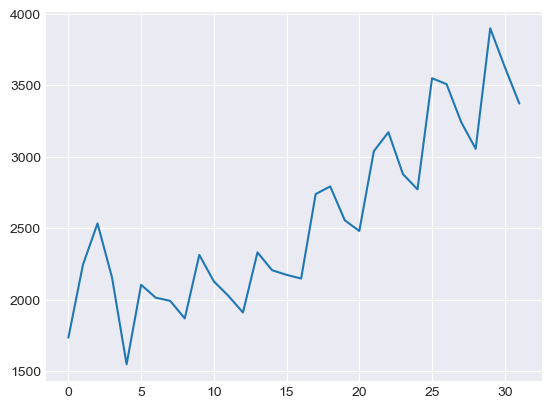

In [32]:
plt.plot(Train.index, Train["Sales"], label='Train')

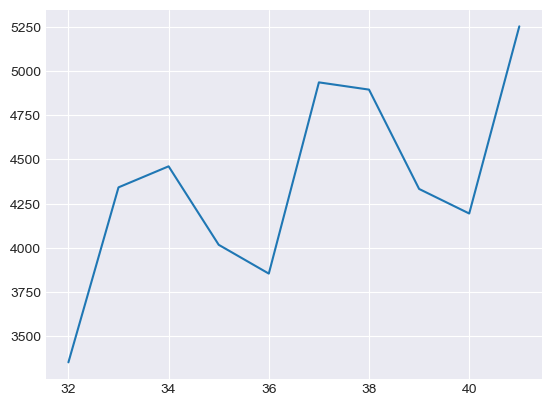

In [33]:
plt.plot(Test.index, Test["Sales"], label='Test')

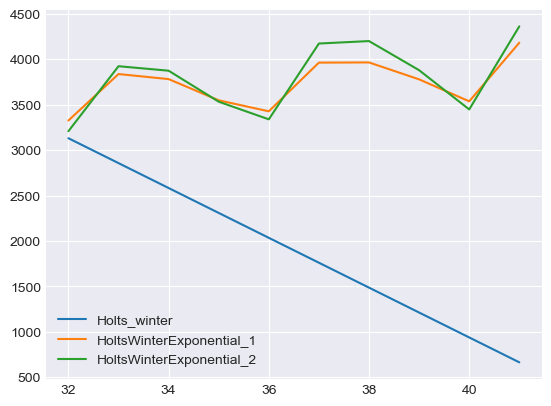

In [35]:
plt.plot(pred_hw.index, pred_hw, label='Holts_winter')
plt.plot(pred_hwe_add_add.index,pred_hwe_add_add,label="HoltsWinterExponential_1")
plt.plot(pred_hwe_mul_add.index,pred_hwe_mul_add,label="HoltsWinterExponential_2")
plt.legend(loc='best')

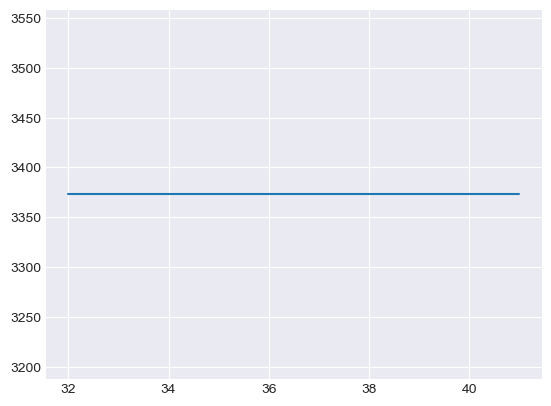

In [36]:
plt.plot(pred_ses.index, pred_ses, label='SimpleExponential')

# Model based methods

In [37]:
quarter=['Q1','Q2','Q3','Q4']
n=coco['Quarter'][0]
n[0:2]

coco['quarter']=0

In [38]:
for i in range(42):
    n=coco['Quarter'][i]
    coco['quarter'][i]=n[0:2]
    
dummy=pd.DataFrame(pd.get_dummies(coco['quarter']))

coco_1=pd.concat((coco,dummy),axis=1)
coco_1.head(6)

,Quarter,Sales,quarter,Q1,Q2,Q3,Q4
0,Q1_86,1734.827000,Q1,1,0,0,0
1,Q2_86,2244.960999,Q2,0,1,0,0
2,Q3_86,2533.804993,Q3,0,0,1,0
3,Q4_86,2154.962997,Q4,0,0,0,1
4,Q1_87,1547.818996,Q1,1,0,0,0
5,Q2_87,2104.411995,Q2,0,1,0,0


In [39]:
t= np.arange(1,43)
coco_1['t']=t
coco_1['t_square']=coco_1['t']*coco_1['t']
log_Sales=np.log(coco_1['Sales'])
coco_1['log_Sales']=log_Sales
coco_1.head(6)

,Quarter,Sales,quarter,Q1,Q2,Q3,Q4,t,t_square,log_Sales
0,Q1_86,1734.827000,Q1,1,0,0,0,1,1,7.458663
1,Q2_86,2244.960999,Q2,0,1,0,0,2,4,7.716443
2,Q3_86,2533.804993,Q3,0,0,1,0,3,9,7.837477
3,Q4_86,2154.962997,Q4,0,0,0,1,4,16,7.675529
4,Q1_87,1547.818996,Q1,1,0,0,0,5,25,7.344602
5,Q2_87,2104.411995,Q2,0,1,0,0,6,36,7.651791


# Model building

In [40]:
Train1=coco_1.head(32)
Test1=coco_1.tail(10)

# Linear model

In [41]:
linear= smf.ols('Sales~t',data=Train1).fit()
predlin=pd.Series(linear.predict(pd.DataFrame(Test1['t'])))
rmselin=np.sqrt((np.mean(np.array(Test1['Sales'])-np.array(predlin))**2))
rmselin

603.8900128503703

# Quadratic Model

In [42]:
quad=smf.ols('Sales~t+t_square',data=Train1).fit()
predquad=pd.Series(quad.predict(pd.DataFrame(Test1[['t','t_square']])))
rmsequad=np.sqrt(np.mean((np.array(Test1['Sales'])-np.array(predquad))**2))
rmsequad

457.73573554072897

# Exponential model

In [43]:
expo=smf.ols('log_Sales~t',data=Train1).fit()
predexp=pd.Series(expo.predict(pd.DataFrame(Test1['t'])))
predexp
rmseexpo=np.sqrt(np.mean((np.array(Test1['Sales'])-np.array(np.exp(predexp)))**2))
rmseexpo

590.3316432076576

# Additive seasonality.

In [44]:
additive = smf.ols('Sales~Q1+Q2+Q3+Q4',data=Train1).fit()
predadd = pd.Series(additive.predict(Test1[['Q1','Q2','Q3','Q4']]))
rmseadd = np.sqrt(np.mean((np.array(Test1['Sales'])-np.array(predadd))**2))
rmseadd

1850.4665461858358

# Additive seasonality with linear trend.

In [45]:
addlinear = smf.ols('Sales~t+Q1+Q2+Q3+Q4',data=Train1).fit()
predaddlinear = pd.Series(addlinear.predict(Test1[['t','Q1','Q2','Q3','Q4']]))
rmseaddlinear=np.sqrt(np.mean((np.array(Test1['Sales'])-np.array(predaddlinear))**2))
rmseaddlinear

673.4432892659155

# Additive seasonality with quadratic trend.

In [46]:
addquad = smf.ols('Sales~t+t_square+Q1+Q2+Q3+Q4',data=Train1).fit()
predaddquad = pd.Series(addquad.predict(Test1[['t','t_square','Q1','Q2','Q3','Q4']]))
rmseaddquad=np.sqrt(np.mean((np.array(Test1['Sales'])-np.array(predaddquad))**2))
rmseaddquad

277.35107711286446

# Multiplicative seasonality.

In [47]:
mulsea=smf.ols('log_Sales~Q1+Q2+Q3+Q4',data=Train1).fit()
predmul= pd.Series(mulsea.predict(pd.DataFrame(Test1[['Q1','Q2','Q3','Q4']])))
rmsemul= np.sqrt(np.mean((np.array(Test1['Sales'])-np.array(np.exp(predmul)))**2))
rmsemul

1908.2503948361168

# Multiplicative seasonality with linear trend

In [48]:
mullin = smf.ols('log_Sales~t+Q1+Q2+Q3+Q4',data=Train1).fit()
predmullin = pd.Series(mullin.predict(Test1[['t','Q1','Q2','Q3','Q4']]))
rmsemulin=np.sqrt(np.mean((np.array(Test1['Sales'])-np.array(predmullin))**2))
rmsemul

1908.2503948361168

# Multiplicative seasonality with quadratic trend

In [49]:
mul_quad= smf.ols('log_Sales~t+t_square+Q1+Q2+Q3+Q4',data=Train1).fit()
pred_mul_quad= pd.Series(mul_quad.predict(Test1[['t','t_square','Q1','Q2','Q3','Q4']]))
rmse_mul_quad=np.sqrt(np.mean((np.array(Test1['Sales'])-np.array(np.exp(pred_mul_quad)))**2))
rmse_mul_quad

801.9777856536299

# Compare RMSE Value.

In [50]:
data={'Model':pd.Series(['rmse_mul_quad','rmseadd','rmseaddlinear','rmseaddquad','rmseexpo','rmselin','rmsemul','rmsemulin','rmsequad']),
      'Values':pd.Series([rmse_mul_quad,rmseadd,rmseaddlinear,rmseaddquad,rmseexpo,rmselin,rmsemul,rmsemulin,rmsequad])}
table_rmse=pd.DataFrame(data)

In [51]:
table_rmse

,Model,Values
0,rmse_mul_quad,801.977786
1,rmseadd,1850.466546
2,rmseaddlinear,673.443289
3,rmseaddquad,277.351077
4,rmseexpo,590.331643
5,rmselin,603.890013
6,rmsemul,1908.250395
7,rmsemulin,4387.942188
8,rmsequad,457.735736
